In [5]:
import pandas as pd
import numpy as np 
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns 
#import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
#Visualize Geospatial Data
#import folium



In [8]:
#reading the data
credit_card_info = pd.read_csv('cc_info.csv')
transaction_info = pd.read_csv('transactions.csv')

In [10]:
credit_card_info.head(10)

,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000
5,1997929794676601,Atlanta,NY,14808,21000
6,5449610971108305,Pittsburgh,PA,15201,6000
7,7482288151831611,Birmingham,NJ,8011,4000
8,8137811493121777,Washington,NH,3280,15000
9,7804216189681274,Los Angeles,CA,90001,20000


In [11]:
transaction_info.head(10)

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719
5,1003715054175576,2015-10-17 21:28:57,121.60,-80.243565,40.260887
6,1003715054175576,2015-08-29 18:34:04,122.65,-80.238186,40.245928
7,1003715054175576,2015-08-14 21:34:39,98.00,-80.244063,40.249143
8,1003715054175576,2015-09-17 19:20:37,95.20,-2.833179,34.745015
9,1003715054175576,2015-09-11 18:59:04,57.95,-80.287528,40.267874


In [17]:
#check for missing values
credit_card_info.isnull().sum()

credit_card          0
city                 0
state                0
zipcode              0
credit_card_limit    0
dtype: int64

In [16]:
transaction_info.isnull().sum()

credit_card                  0
date                         0
transaction_dollar_amount    0
Long                         0
Lat                          0
dtype: int64

In [14]:
credit_card_info.info()
transaction_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   credit_card        984 non-null    int64 
 1   city               984 non-null    object
 2   state              984 non-null    object
 3   zipcode            984 non-null    int64 
 4   credit_card_limit  984 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 38.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 5 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   credit_card                294588 non-null  int64  
 1   date                       294588 non-null  object 
 2   transaction_dollar_amount  294588 non-null  float64
 3   Long                       294588 non-null  float64
 4   Lat                        294588 non-null  float64
dtypes:

### New merged Table

In [20]:
#merge the two data frame 
df_credit_card = transaction_info.merge(credit_card_info, on = 'credit_card')

In [25]:
df_credit_card.head(5)

,credit_card,date,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,Houston,PA,15342,20000
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,Houston,PA,15342,20000
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,Houston,PA,15342,20000
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,Houston,PA,15342,20000
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,Houston,PA,15342,20000


In [26]:
df_credit_card.describe()

,credit_card,transaction_dollar_amount,Long,Lat,zipcode,credit_card_limit
count,2.945880e+05,294588.000000,294588.000000,294588.000000,294588.000000,294588.000000
mean,5.424562e+15,86.008036,-76.235238,40.937669,18073.772516,15502.053716
std,2.555803e+15,124.655954,20.135015,5.391695,23945.510551,7956.291556
min,1.003715e+15,0.010000,-179.392887,-68.046553,690.000000,2000.000000
25%,3.344214e+15,29.970000,-80.209708,40.487726,3280.000000,10000.000000
50%,5.353426e+15,58.470000,-73.199737,42.403066,5820.000000,15000.000000
75%,7.646245e+15,100.400000,-72.091933,43.180015,18612.000000,20000.000000
max,9.999757e+15,999.970000,179.917513,78.914330,98401.000000,55000.000000


In [28]:
df_credit_card.shape

(294588, 9)

In [29]:
df_credit_card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294588 entries, 0 to 294587
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   credit_card                294588 non-null  int64  
 1   date                       294588 non-null  object 
 2   transaction_dollar_amount  294588 non-null  float64
 3   Long                       294588 non-null  float64
 4   Lat                        294588 non-null  float64
 5   city                       294588 non-null  object 
 6   state                      294588 non-null  object 
 7   zipcode                    294588 non-null  int64  
 8   credit_card_limit          294588 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 22.5+ MB


In [30]:
df_credit_card.isnull().sum()

credit_card                  0
date                         0
transaction_dollar_amount    0
Long                         0
Lat                          0
city                         0
state                        0
zipcode                      0
credit_card_limit            0
dtype: int64

### Data Visualisation

<AxesSubplot:>

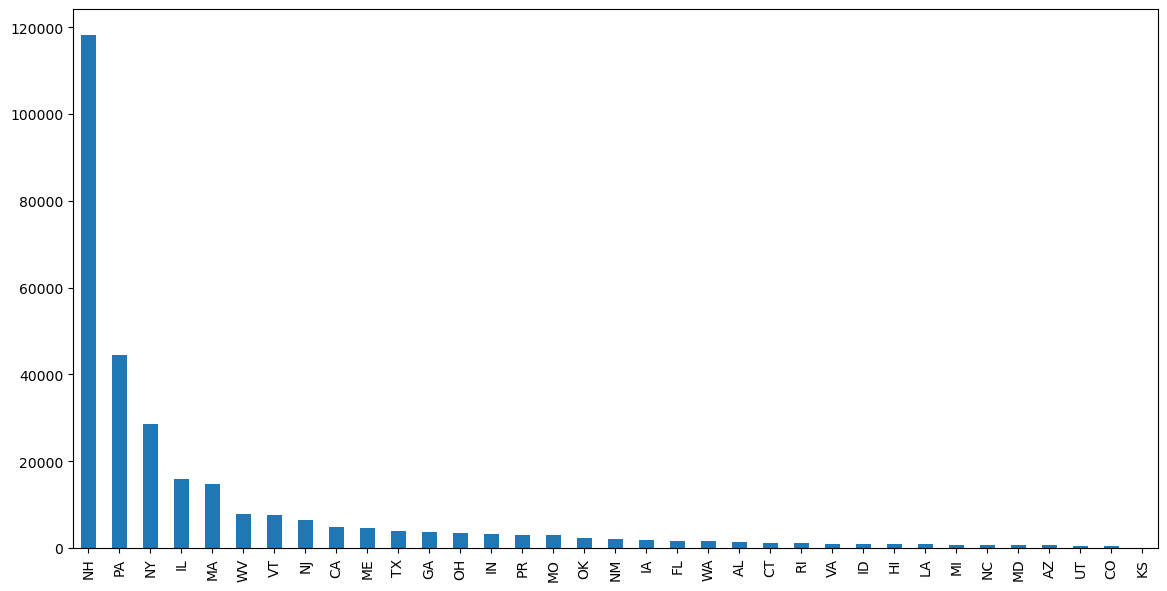

In [33]:
#number of transaction records 
df_credit_card['state'].value_counts().plot(kind='bar',  figsize = (14,7))
